# Extra Practice for Machine Learning
For this challenge, you will be working with two datasets - the `cars` and the `barley` datasets from `vega_datasets`. You may have seen them before, but if not, they are described below.

In [1]:
import pandas as pd

cars = pd.read_csv('cars.csv')
barley = pd.read_csv('barley.csv')

The `cars` dataset is a dataset with a bunch of different models of car, with several different statistics about each of them, including their horsepower, acceleration, etc., the year they were released, and their country of origin. Here's what it looks like:

In [2]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


## ML with Quantitative Data

Create and train a model that, given the `cars` dataset, will predict the Horsepower of a car. Think about the type of data you are trying to predict - what model (of the ones we have already seen) should you use to predict quantitative data? Make sure to split training and testing data, and check the mean squared error of your model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor # which model should you import?
from sklearn.metrics import accuracy_score, mean_squared_error # How do you measure it?
from sklearn.model_selection import train_test_split

# Enter the rest of your solution here!
cars = cars.dropna()
columns = ['Cylinders', 'Displacement', 'Weight_in_lbs', 'Acceleration', 'Miles_per_Gallon']
# print(columns)
features = cars.loc[:, columns]
labels = cars['Horsepower']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(max_depth=5)

model.fit(features_train, labels_train)

predicted = model.predict(features_test)
mean = mean_squared_error(labels_test, predicted)
mean

190.0246993810375

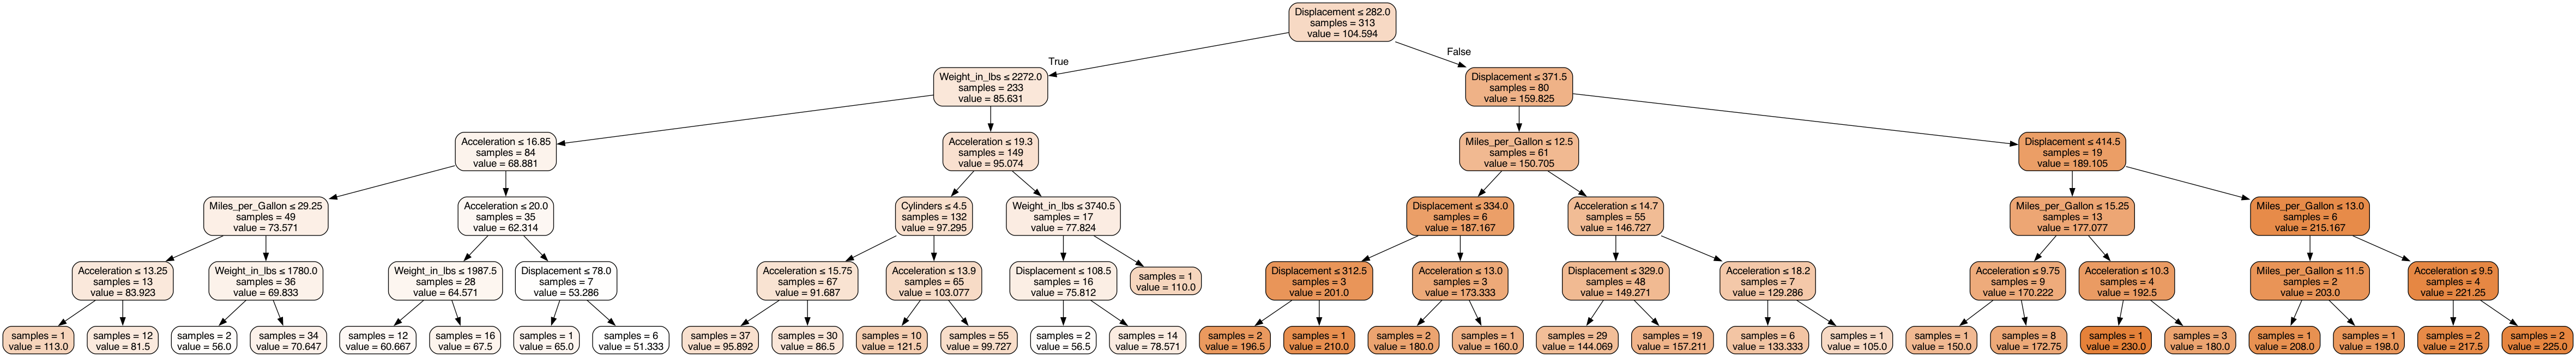

In [127]:
from IPython.display import Image, display

import graphviz 
from sklearn.tree import export_graphviz


def plot_tree(model, features, labels):
    dot_data = export_graphviz(model, out_file=None, 
            feature_names=features.columns,  
            class_names=labels.unique(),
            impurity=False,
            filled=True, rounded=True,  
            special_characters=True) 
    graphviz.Source(dot_data).render('tree.gv', format='png')
    display(Image(filename='tree.gv.png'))


plot_tree(model, features, labels)

Bonus: How does accuracy or mean squared error change with the split between training and testing data? Do at least three different splits with this data to see. 

In [85]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1)
model = DecisionTreeRegressor()

model.fit(features_train, labels_train)

predicted = model.predict(features_test)
accuracy = accuracy_score(labels_test, predicted)
mean = mean_squared_error(labels_test, predicted)
accuracy, mean

(0.125, 148.55)

In [86]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.5)
model = DecisionTreeRegressor()

model.fit(features_train, labels_train)

predicted = model.predict(features_test)
accuracy = accuracy_score(labels_test, predicted)
mean = mean_squared_error(labels_test, predicted)
accuracy, mean

(0.11224489795918367, 220.7908163265306)

More Bonus: Testing hyperparameters. What maximum depth has the greatest accuracy in our testing set. If we want to do this without making decision off our our training dataset, we need to split our data into three categories: train, test, and development. Then we can compare our changes in how it affects the development dataset and not the training dataset so we can do a final evaluation at the end with our final model. 

In [133]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load and prepare the dataset
features = ['Cylinders', 'Displacement', 'Weight_in_lbs', 'Acceleration', 'Miles_per_Gallon']
cars = cars.dropna(subset=features + ['Horsepower'])

X = cars[features]
y = cars['Horsepower']

# Split into train (60%), dev (20%), test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 of 0.8 = 0.2

# Try different max_depth values
best_depth = None
best_score = float('-inf')

print("Tuning max_depth...")
for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    predictions = model.predict(X_dev)
    r2 = r2_score(y_dev, predictions)
    print(f"max_depth={depth}, R² Score on dev: {r2:.4f}")
    
    if r2 > best_score:
        best_score = r2
        best_depth = depth

print(f"\n✅ Best max_depth from dev set: {best_depth}")

# Optional: Retrain on train+dev and evaluate on test set
X_final = pd.concat([X_train, X_dev])
y_final = pd.concat([y_train, y_dev])

final_model = DecisionTreeRegressor(max_depth=best_depth)
final_model.fit(X_final, y_final)

final_predictions = final_model.predict(X_test)
final_r2 = r2_score(y_test, final_predictions)
final_mse = mean_squared_error(y_test, final_predictions)

print(f"\n🎯 Final Model Performance on Test Set:")
print(f"R² Score: {final_r2:.4f}")
print(f"Mean Squared Error: {final_mse:.2f}")


Tuning max_depth...
max_depth=1, R² Score on dev: 0.6749
max_depth=2, R² Score on dev: 0.7297
max_depth=3, R² Score on dev: 0.7667
max_depth=4, R² Score on dev: 0.7599
max_depth=5, R² Score on dev: 0.7833
max_depth=6, R² Score on dev: 0.7764
max_depth=7, R² Score on dev: 0.7742
max_depth=8, R² Score on dev: 0.7651
max_depth=9, R² Score on dev: 0.7620
max_depth=10, R² Score on dev: 0.7744
max_depth=11, R² Score on dev: 0.7618
max_depth=12, R² Score on dev: 0.7573
max_depth=13, R² Score on dev: 0.7475
max_depth=14, R² Score on dev: 0.7539
max_depth=15, R² Score on dev: 0.7638
max_depth=16, R² Score on dev: 0.7616
max_depth=17, R² Score on dev: 0.7644
max_depth=18, R² Score on dev: 0.7581
max_depth=19, R² Score on dev: 0.7575
max_depth=20, R² Score on dev: 0.7426

✅ Best max_depth from dev set: 5

🎯 Final Model Performance on Test Set:
R² Score: 0.8751
Mean Squared Error: 192.85


## ML with Categorical Data

Create, train, and test a model that will predict the country of origin for the `cars` dataset. Remember, this is categorical data, so you will need to use a different type of model (of the ones we have already seen) than you did for the `Horsepower` model.

In [134]:
cars = pd.read_csv('cars.csv')
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [156]:
from sklearn.tree import DecisionTreeClassifier # which model should you import?
from sklearn.metrics import accuracy_score # How do you measure it?
from sklearn.model_selection import train_test_split

# Enter the rest of your solution here!
cars = cars.dropna()
columns = ['Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs', 'Acceleration', 'Miles_per_Gallon']
# print(columns)
features = cars.loc[:, columns]
labels = cars['Origin']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=5)

model.fit(features_train, labels_train)

predicted = model.predict(features_test)
acc = accuracy_score(labels_test, predicted)
acc


0.759493670886076

Bonus: How does accuracy or mean squared error change with the split between training and testing data? Do at least three different splits with this data to see. 

More Bonus: Testing hyperparameters. What maximum depth (or other hyperparameter) has the greatest accuracy in our testing set? If we want to do this without making decision off our our training dataset, we need to split our data into three categories: train, test, and development. Then we can compare our changes in how it affects the development dataset and not the training dataset so we can do a final evaluation at the end with our final model. 